# Numerical Linear Algebra
Based on Turner et al. 

We're looking at 
$$
A{\bf x}={\bf b}
$$
where $A$ is a $nxn$ matrix, and ${\bf x}$  and ${\bf b}$ are $n$-dimensional vectors. 


## Matrix operations in Python
Matrix operations are fundamental in numerical computing, and Python, with the help of the NumPy library, provides efficient and intuitive tools for working with matrices. NumPy supports a wide range of matrix operations, including addition, multiplication, transposition, inversion, and decomposition. These capabilities make it a powerful choice for scientific computing, data analysis, and machine learning tasks. In this section, we will explore how to perform basic and advanced matrix operations using NumPy.

- **Matrix addition:**  
    `C = A + A`  &nbsp;# Element-wise addition

- **Matrix multiplication:**  
    `C = A @ A`  &nbsp;# Matrix product (dot product)

- **Matrix vector multiplication:**  
    `w = A @ v`  &nbsp;# Matrix vector product (dot product)
    
- **Vector dot product:**
    `s = w @ v`  &nbsp;# Matrix vector product (dot product)

- **Transpose:**  
    `A_T = A.T`

- **Inverse:**  
    `A_inv = np.linalg.inv(A)`

- **Determinant:**  
    `det_A = np.linalg.det(A)`

- **Extract diagonal:**  
    `diag_A = np.diag(A)`

- **Solve linear system $Ax = b$:**  
    `x = np.linalg.solve(A, b)`


In [34]:
import numpy as np

# Example matrices
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Example vectors
v1 = np.array([1, 2])
v2 = np.array([3, 4])

# Matrix addition
C_add = A + B
print("Matrix Addition:\n", C_add)

# Matrix multiplication (dot product)
C_mul = A @ B
print("\nMatrix Multiplication:\n", C_mul)

# Vector addition
v_add = v1 + v2
print("\nVector Addition:", v_add)

# Dot product
v_dot = np.dot(v1, v2)
print("Dot Product:", v_dot)

# Norm of a vector
v1_norm = np.linalg.norm(v1)
print("Norm of v1:", v1_norm)

# Matrix vector multiplication
Av1 = A @ v1
print("\nMatrix-Vector Multiplication (A @ v1):", Av1)

print(f"Element-wise multiplication (A * v1):\n {A * v1}")

# Transpose
A_T = A.T
print("\nTranspose of A:\n", A_T)

# Inverse
A_inv = np.linalg.inv(A)
print("\nInverse of A:\n", A_inv)

# Determinant
det_A = np.linalg.det(A)
print("\nDeterminant of A:", det_A)

# Extract diagonal
diag_A = np.diag(A)
print("\nDiagonal of A:", diag_A)

# Solve linear system Ax = b
b = np.array([1, 2])
x = np.linalg.solve(A, b)
print("\nSolution to Ax = b:", x)

Matrix Addition:
 [[ 6  8]
 [10 12]]

Matrix Multiplication:
 [[19 22]
 [43 50]]

Vector Addition: [4 6]
Dot Product: 11
Norm of v1: 2.23606797749979

Matrix-Vector Multiplication (A @ v1): [ 5 11]
Element-wise multiplication (A * v1):
 [[1 4]
 [3 8]]

Transpose of A:
 [[1 3]
 [2 4]]

Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]

Determinant of A: -2.0000000000000004

Diagonal of A: [1 4]

Solution to Ax = b: [0.  0.5]


In [36]:
#help(np.linalg)

## Gauss elimination
Treated in courses in linear algebra. Here is a demonstration. 

Might have to pivot rows to avoid dividing with zero and to prevent round off errors. 

To be aware of in numerical Gaussian elimination; division by zero, round off errors, dividing with small numbers, subtracting small numbers ...

A short demonstration below. 

In [ ]:
import numpy as np

def gauss_elimination(A, b, pivoting=False,verbatim=True): # Slightly different than the code in Turner et al. 
    n = len(b) # Number of equations
    # Forward elimination
    if verbatim: print(f"Original A:\n {A}\n") # Print original matrix if verbatim is True
    for i in range(n): 
        # Partial pivoting
        max_row = np.argmax(abs(A[i:, i])) + i # Find the index of the maximum element in the current column
        if pivoting and i != max_row: # Swap rows if needed
            A[[i, max_row]] = A[[max_row, i]] # Swap rows in A
            b[[i, max_row]] = b[[max_row, i]] # Swap corresponding elements in b
        # Eliminate entries below pivot
        for j in range(i+1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]
        if verbatim: print(f"Matrix A after iteration {i+1}:\n{A}\n")
    # Back substitution
    x = np.zeros(n) # Initialize solution vector
    for i in range(n-1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i] # Back substitution
    return x


In [85]:

# Example usage:
A = np.array([[1.0, 3.0, 5.0],
              [3.0, 5.0, 5.0],
              [5.0, 5.0, 5.0]])
b = np.array([9.0, 13.0, 15.0])
x = gauss_elimination(A.copy(), b.copy())
print("matrix A: \n", A)
print("vector b:    ", b)
print("\nSystem of equations:")
for i in range(A.shape[0]):
    row = " + ".join([f"{A[i, j]:>5}*x{j+1}" if A[i, j] >= 0 else f"- {abs(A[i, j]):>4}*x{j+1}" for j in range(A.shape[1])])
    print(f"Eq{i+1}: {row} = {b[i]:>5}")

print("\nSolution:")
for i, val in enumerate(x, 1):
    print(f"x{i} = {val}")
print("Solution:", x)

Original A:
 [[1. 3. 5.]
 [3. 5. 5.]
 [5. 5. 5.]]

Matrix A after iteration 1:
[[  1.   3.   5.]
 [  0.  -4. -10.]
 [  0. -10. -20.]]

Matrix A after iteration 2:
[[  1.   3.   5.]
 [  0.  -4. -10.]
 [  0.   0.   5.]]

Matrix A after iteration 3:
[[  1.   3.   5.]
 [  0.  -4. -10.]
 [  0.   0.   5.]]

matrix A: 
 [[1. 3. 5.]
 [3. 5. 5.]
 [5. 5. 5.]]
vector b:     [ 9. 13. 15.]

System of equations:
Eq1:   1.0*x1 +   3.0*x2 +   5.0*x3 =   9.0
Eq2:   3.0*x1 +   5.0*x2 +   5.0*x3 =  13.0
Eq3:   5.0*x1 +   5.0*x2 +   5.0*x3 =  15.0

Solution:
x1 = 1.0
x2 = 1.0
x3 = 1.0
Solution: [1. 1. 1.]


**Task**
Use the example code above to solve Example 3 on p. 87 in Turner: 
$$
\left[\begin{array}{rrr}
7 & -7 & 1 \\
-3 & 3 & 2 \\
7 & 7 & -72 
\end{array}
\right]
\left[\begin{array}{rrr}
x \\
y\\
z
\end{array}
\right]
= 
\left[\begin{array}{rrr}
1\\
2\\
7
\end{array}
\right]
$$

### Hilbert matrices

Hilbert matrices are a special class of square matrices with elements given by 
$$H_{ij} = \frac{1}{i + j - 1},
$$
 where $i$ and $j$ are the row and column indices, respectively. These matrices are symmetric and positive definite, making them important in numerical analysis and linear algebra. However, Hilbert matrices are also notoriously ill-conditioned, meaning that small changes in input can lead to large errors in solutions when solving linear systems involving them. This property makes Hilbert matrices a classic example for testing the stability and accuracy of numerical algorithms.

The $5 \times 5$ Hilbert matrix:

$$
H = \begin{bmatrix}
1 & \frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \frac{1}{5} \\
\frac{1}{2} & \frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \frac{1}{6} \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{5} & \frac{1}{6} & \frac{1}{7} \\
\frac{1}{4} & \frac{1}{5} & \frac{1}{6} & \frac{1}{7} & \frac{1}{8} \\
\frac{1}{5} & \frac{1}{6} & \frac{1}{7} & \frac{1}{8} & \frac{1}{9}
\end{bmatrix}
$$

Let's do Example 6 on p. 92


In [80]:
from scipy.linalg import hilbert
import numpy as np
H=hilbert(6)
rsH = np.sum(H, axis=1)
x = gauss_elimination(H, rsH, verbatim=False)
prec=4
np.set_printoptions(precision=prec)
print(f"solution with precision {prec}: {x} ")
prec=15
np.set_printoptions(precision=prec)
print(f"solution with precision {prec}: {x} ")

solution with precision 4: [1. 1. 1. 1. 1. 1.] 
solution with precision 15: [0.999999999999228 1.000000000021937 0.999999999851792 1.00000000038537
 0.999999999574584 1.00000000016768 ] 


**Task**

Do this with a 10x10 Hilbert matrix. Do you get the same result as in the book?

### Testing the Gauss elimination routine


In [74]:
np.random.seed(42) # For reproducibility
E = np.zeros((100, 7)) # Error matrix
for n in range(4, 11): # Iterate over different system sizes
    for k in range(100):
        A = np.random.uniform(-5, 5, size=(n, n)) # Random n x n matrix
        b = np.sum(A, axis=1) # Right-hand side vector
        x = gauss_elimination(A, b,verbatim=False) # Solve system
        E[k, n-4] = np.max(np.abs(x - 1)) # Error calculation

print(f"Max error for each system size:")
for n in range(7):
    print(f"n={n+4}: {np.max(E[:, n]):.2e}, mean={np.mean(E[:, n]):.2e}, #larger than 1.e-14: {np.sum(E[:, n] > 1.e-14)}")

Max error for each system size:
n=4: 2.52e-14, mean=2.01e-15, #larger than 1.e-14: 5
n=5: 1.14e-13, mean=6.26e-15, #larger than 1.e-14: 12
n=6: 1.00e-12, mean=1.84e-14, #larger than 1.e-14: 17
n=7: 5.96e-13, mean=3.13e-14, #larger than 1.e-14: 31
n=8: 6.62e-13, mean=2.85e-14, #larger than 1.e-14: 36
n=9: 4.57e-12, mean=1.21e-13, #larger than 1.e-14: 45
n=10: 7.13e-13, mean=4.34e-14, #larger than 1.e-14: 57


## Tri-diagonal matrices
Tri-diagonal matrices are a special type of sparse matrix where nonzero elements appear only on the main diagonal, the diagonal above it, and the diagonal below it. In other words, all other entries are zero. These matrices commonly arise in the discretization of differential equations, especially in finite difference methods for solving boundary value problems. Their structure allows for highly efficient algorithms, such as the Thomas algorithm, to solve linear systems involving tri-diagonal matrices with significantly reduced computational effort compared to general dense matrices.
The one-dimensional heat equation describes how heat diffuses through a rod over time and is given by:
$$
\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2} + f(x,t)
$$
where $u(x, t)$ is the temperature at position $x$ and time $t$, and $\alpha$ is the thermal diffusivity.

### Implicit Scheme (Backward Euler)

For numerical solutions, we discretize both space and time. Let $u_j^n$ denote the temperature at position $x_j$ and time $t_n$. The implicit (backward Euler) scheme for the heat equation is:
$$
\frac{u_j^{n+1} - u_j^n}{\Delta t} = \alpha \frac{u_{j+1}^{n+1} - 2u_j^{n+1} + u_{j-1}^{n+1}}{(\Delta x)^2} + f_j^{n+1}
$$
This leads to a linear system for $u^{n+1}$ at each time step, which can be written as a tri-diagonal matrix equation:
$$
A \mathbf{u}^{n+1} = \mathbf{u}^n + \mathbf{f}^n
$$
where $A$ is a tri-diagonal matrix with main diagonal $1 + 2r$, and off-diagonals $-r$, with $r = \alpha \Delta t / (\Delta x)^2$.

The tri-diagonal structure of $A$ allows efficient solution using specialized algorithms.

**Applications:**  
Implicit methods are unconditionally stable and allow for larger time steps compared to explicit methods, making them suitable for stiff problems and long-time simulations. The tri-diagonal matrix structure arises naturally from the finite difference discretization of the second derivative in space.





# LU factorization

LU factorization is a method of decomposing a square matrix $A$ into the product of a lower triangular matrix $L$ and an upper triangular matrix $U$, such that $A = LU$. This technique simplifies the process of solving systems of linear equations, computing determinants, and inverting matrices. LU factorization is widely used in numerical linear algebra due to its efficiency and stability, especially for large systems.

LU factorization allows us to efficiently solve multiple systems of linear equations with the same coefficient matrix $A$ but different right-hand sides $b$. Once $A$ is decomposed into $L$ and $U$, we can solve $Ax = b$ by first solving $Ly = b$ (forward substitution) and then $Ux = y$ (back substitution), which is computationally cheaper than performing Gaussian elimination for each new $b$. This is especially useful in applications such as simulations, optimization, and engineering problems where the same system structure is reused with varying inputs.

In [81]:
from scipy.linalg import lu
A=[[1,2,3],[4,5,6],[7,8,9]]
# Perform LU factorization of matrix A
P, L, U = lu(A)

print("Matrix A:")
print(A)
print("\nPermutation matrix P:")
print(P)
print("\nLower triangular matrix L:")
print(L)
print("\nUpper triangular matrix U:")
print(U)

# Verify the factorization: P @ A = L @ U
print("\nCheck: A == P @ L @ U ?")
print(np.allclose( A, P @L @ U))
print( A== P @L @ U)
print("\nP @ L @ U:")
print(P @ L @ U)    

Matrix A:
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

Permutation matrix P:
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]

Lower triangular matrix L:
[[1.                0.                0.               ]
 [0.142857142857143 1.                0.               ]
 [0.571428571428571 0.5               1.               ]]

Upper triangular matrix U:
[[ 7.000000000000000e+00  8.000000000000000e+00  9.000000000000000e+00]
 [ 0.000000000000000e+00  8.571428571428572e-01  1.714285714285714e+00]
 [ 0.000000000000000e+00  0.000000000000000e+00 -1.586032892321652e-16]]

Check: A == P @ L @ U ?
True
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]

P @ L @ U:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


The results above demonstrate the process of solving a system of linear equations $Ax = b$ using Gaussian elimination and LU factorization.

- **Matrix $A$** is the coefficient matrix of the system.
- **Vector $b$** contains the right-hand side values.
- **Gaussian elimination** is used to transform $A$ into an upper triangular form, allowing for back substitution to find the solution vector $x$.
- The computed **solution $x = [2, 3, -1]$** satisfies the system $Ax = b$.

**LU factorization** decomposes $A$ into:
- **$P$:** Permutation matrix (for row swaps during pivoting)
- **$L$:** Lower triangular matrix
- **$U$:** Upper triangular matrix

This factorization enables efficient solutions for multiple right-hand sides and verifies the correctness of the decomposition by checking if $A = PLU$. The values of $L$, $U$, and $P$ shown above correspond to the decomposition of $A$ used in the calculations.

**Tasks**
Do LU factorization the $A$ matrix in Example 3 on p. 87 in Turner: 
$$
\left[\begin{array}{rrr}
7 & -7 & 1 \\
-3 & 3 & 2 \\
7 & 7 & -72 
\end{array}
\right]
\left[\begin{array}{rrr}
x \\
y\\
z
\end{array}
\right]
= 
\left[\begin{array}{rrr}
1\\
2\\
7
\end{array}
\right]
$$

# Iterative methods. 
Iterative methods are algorithms used to solve systems of linear equations by generating a sequence of approximations that converge to the exact solution. Unlike direct methods (such as Gaussian elimination), which attempt to solve the system in a finite number of steps, iterative methods start with an initial guess and improve it through repeated updates. 

We need iterative methods because they are often more efficient and practical for large, sparse, or structured systems where direct methods become computationally expensive or require excessive memory. Iterative techniques, such as the Jacobi and Gauss-Seidel methods, are especially useful in scientific computing, engineering simulations, and when dealing with matrices that arise from discretizing partial differential equations. They can exploit matrix sparsity, are easier to parallelize, and can provide approximate solutions quickly when high precision is not required.

### Jacobi Method Equations

Given a linear system $A\mathbf{x} = \mathbf{b}$, the Jacobi method updates each component of $\mathbf{x}$ iteratively as follows:

$$
x_i^{(k+1)} = \frac{1}{a_{ii}} \left( b_i - \sum_{\substack{j=1 \\ j \neq i}}^{n} a_{ij} x_j^{(k)} \right), \quad i = 1, 2, \ldots, n
$$

where:
- $x_i^{(k+1)}$ is the new value of the $i$-th variable at iteration $k+1$,
- $a_{ii}$ is the diagonal element of $A$,
- $b_i$ is the $i$-th entry of $\mathbf{b}$,
- $a_{ij}$ are the off-diagonal elements of $A$,
- $x_j^{(k)}$ are the values from the previous iteration.

All updates for $x_i^{(k+1)}$ use only the values from the previous iteration $k$. This makes the Jacobi method easy to parallelize.

In [ ]:
def jacobi (A , b , Nits ) :  # Jacobi method
    """ Performs Function for computing  Nits  iterations 
    of the Jacobi method for Ax=b 
    where A  must be square .  """
    D = np . diag ( A ) # Extract diagonal
    n = A . shape [0]
    A_D = A - np . diag ( D ) # This is L+U
    x = np . zeros ( n ) # Initial guess
    s = np . zeros ( ( n , Nits ) ) # Store all iterations
    for k in range ( Nits ) :
        x = ( b - A_D . dot ( x ) ) / D
        s [: , k] = x
    return s

In [87]:
import pprint

dim=5
np.random.seed(42) # For reproducibility
A = 10 * np.eye(dim) # Diagonal matrix
A += np.random.rand(dim, dim)
b = np.sum(A, axis=1)
pprint.pprint(f"A:\n{A}")
S = jacobi(A, b, 6)
pprint.pprint(f"S:\n{S}")

('A:\n'
 '[[10.374540118847362  0.950714306409916  0.731993941811405\n'
 '   0.598658484197037  0.156018640442437]\n'
 ' [ 0.155994520336203 10.058083612168199  0.866176145774935\n'
 '   0.601115011743209  0.708072577796045]\n'
 ' [ 0.020584494295802  0.969909852161994 10.832442640800421\n'
 '   0.212339110678276  0.181824967207101]\n'
 ' [ 0.183404509853434  0.304242242959538  0.524756431632238\n'
 '  10.431945018642116  0.291229140198042]\n'
 ' [ 0.611852894722379  0.139493860652042  0.292144648535218\n'
 '   0.366361843293692 10.456069984217036]]')
('S:\n'
 '[[1.234939124523969 0.960501252708292 1.006314776100398 0.998928905459292\n'
 '  1.000177120621496 0.999970472290329]\n'
 ' [1.231789508374133 0.968387570174682 1.005849470732872 0.999069167939661\n'
 '  1.00015773433911  0.999973949080708]\n'
 ' [1.127825133283222 0.974086860016365 1.00373496896403  0.999323022686731\n'
 '  1.000108267243687 0.999981677216007]\n'
 ' [1.12496541367057  0.97891531746649  1.003611961278389 0.99941

In [48]:
def gauss_seidel(A, b, Nits):
    """Performs Nits iterations of the Gauss-Seidel method for Ax=b."""
    n = A.shape[0]
    x = np.zeros(n)
    s = np.zeros((n, Nits))
    for k in range(Nits):
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i])
            sum2 = np.dot(A[i, i+1:], x[i+1:])
            x[i] = (b[i] - sum1 - sum2) / A[i, i]
        s[:, k] = x
    return s

# Demonstration with the same A and b as before
S_gs = gauss_seidel(A, b, 6)
print("Gauss-Seidel iterations (columns are successive approximations):")
print(S_gs)

Gauss-Seidel iterations (columns are successive approximations):
[[1.23493912 0.97862127 1.00000482 1.00001687 0.99999972 0.99999999]
 [1.21263638 0.99911791 0.99985267 1.00000337 1.00000009 1.        ]
 [1.01690199 1.00008771 0.99997511 1.00000018 1.00000002 1.        ]
 [1.01673493 1.00088972 0.99997115 0.9999995  1.00000003 1.        ]
 [0.9823568  1.00122915 1.00000339 0.99999898 1.00000001 1.        ]]


## Eigenvalues

### Gerschgorin discs

NameError: name 'min_real' is not defined

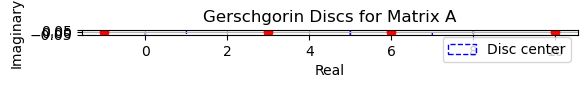

In [49]:
import matplotlib.pyplot as plt
A = np.array([[3, 0, 1],
              [0.5, 4, 0],
              [1, 1, 5]], dtype=float)
A = np.array([[3, 0, 1,-1],
              [0, 6, 0,1],
              [1, 0, -1,0],
              [-1,1,0,10]], dtype=float)
# Compute Gerschgorin discs for matrix A
fig, ax = plt.subplots()
n = A.shape[0]
for i in range(n):
    center = A[i, i]
    radius = np.sum(np.abs(A[i, :])) - np.abs(center)
    circle = plt.Circle((center.real, center.imag), radius, color='b', fill=False, linestyle='--', label='Gerschgorin disc' if i == 0 else "")
    ax.add_artist(circle)
    ax.plot(center.real, center.imag, 'ro')  # Mark the center

# Plot settings
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title("Gerschgorin Discs for Matrix A")
ax.set_aspect('equal', 'box')
plt.grid(True)
plt.legend(['Disc center'])
ax.set_xlim(min_real - max(radii), max_real + max(radii))
ax.set_ylim(-max(radii), max(radii))
plt.show()